---

<h1 style="text-align:center">THÍ NGHIỆM</h1>

---

| Thông số ảnh hưởng |
|--------------------|
| Kích thước quần thể |

# Tình huống tổng quan: 
Các bài toán Knapsack trong 6 test case có số lượng vật phẩm và công suất tối đa khác nhau. Các thuật toán di truyền sử dụng quần thể với kích thước từ 50 đến 500 cá thể, và các yếu tố đo lường gồm:

- Fitness cuối cùng: Giá trị tối ưu của quần thể sau khi chạy thuật toán.
- Tốc độ hội tụ: Số thế hệ cần thiết để đạt được kết quả tối ưu.
- Độ ổn định (std): Sự thay đổi trong Fitness giữa các cá thể trong quần thể.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Genetic_Algorithm import * 

### Nhập số liệu tính toán:

In [11]:
items, max_capacity = get_user_input()
get_info()


Thông tin bài toán:

Vật phẩm 1: Weight = 45, Value = 98
Vật phẩm 2: Weight = 78, Value = 210
Vật phẩm 3: Weight = 123, Value = 155
Vật phẩm 4: Weight = 237, Value = 345
Vật phẩm 5: Weight = 56, Value = 67
Vật phẩm 6: Weight = 111, Value = 122
Vật phẩm 7: Weight = 89, Value = 134
Vật phẩm 8: Weight = 232, Value = 89
Vật phẩm 9: Weight = 344, Value = 450
Vật phẩm 10: Weight = 190, Value = 170
Vật phẩm 11: Weight = 70, Value = 77
Vật phẩm 12: Weight = 250, Value = 190
Vật phẩm 13: Weight = 135, Value = 280
Vật phẩm 14: Weight = 376, Value = 300
Vật phẩm 15: Weight = 92, Value = 113
Vật phẩm 16: Weight = 187, Value = 265
Vật phẩm 17: Weight = 315, Value = 190
Vật phẩm 18: Weight = 220, Value = 158
Vật phẩm 19: Weight = 180, Value = 99
Vật phẩm 20: Weight = 260, Value = 340

Maximum capacity = 2393


### Ghi lại thông số thay đổi với từng kích thước quần thể

In [17]:
# Thực hiện thử nghiệm với các kích thước quần thể khác nhau
population_sizes = [50, 100, 200, 500]
experiment_results = {}

def run_experiment_with_population(pop_size):
    global POPULATION_SIZE, fitness_history
    
    # Lưu giá trị POPULATION_SIZE ban đầu
    original_pop_size = POPULATION_SIZE
    
    # Thay đổi POPULATION_SIZE cho thử nghiệm
    POPULATION_SIZE = pop_size
    
    # Thực hiện thuật toán di truyền
    best_solution, best_fitness = genetic_algorithm()
    
    # Lưu kết quả
    result = {
        'best_solution': best_solution,
        'best_fitness': best_fitness,
        'fitness_history': fitness_history.copy()  # Lưu lại lịch sử fitness
    }
    
    # Reset fitness_history sau mỗi lần thử nghiệm
    fitness_history.clear()
    
    # Khôi phục giá trị POPULATION_SIZE ban đầu
    POPULATION_SIZE = original_pop_size
    
    return result

# Thực hiện các thử nghiệm cho các kích thước quần thể khác nhau
for pop_size in population_sizes:
    print(f"\nThử nghiệm với kích thước quần thể: {pop_size}")
    
    # Chạy thử nghiệm
    result = run_experiment_with_population(pop_size)
    
    # Lưu kết quả vào experiment_results
    experiment_results[pop_size] = result
    
    print(f"Best Solution: {result['best_solution']}")
    print(f"Best Fitness: {result['best_fitness']}")
    print(f"Fitness History: {result['fitness_history']}")



Thử nghiệm với kích thước quần thể: 50
Best Solution: [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1]
Best Fitness: 3126
Fitness History: [2765, 2765, 2880, 2929, 2939, 2957, 3016, 3016, 3016, 3016, 3016, 3016, 3016, 3016, 3016, 3016, 3016, 3059, 3059, 3059, 3059, 3059, 3059, 3059, 3059, 3059, 3059, 3059, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3126, 3

### Fitness qua các thế hệ với thông số kích thước quần thể giống nhau

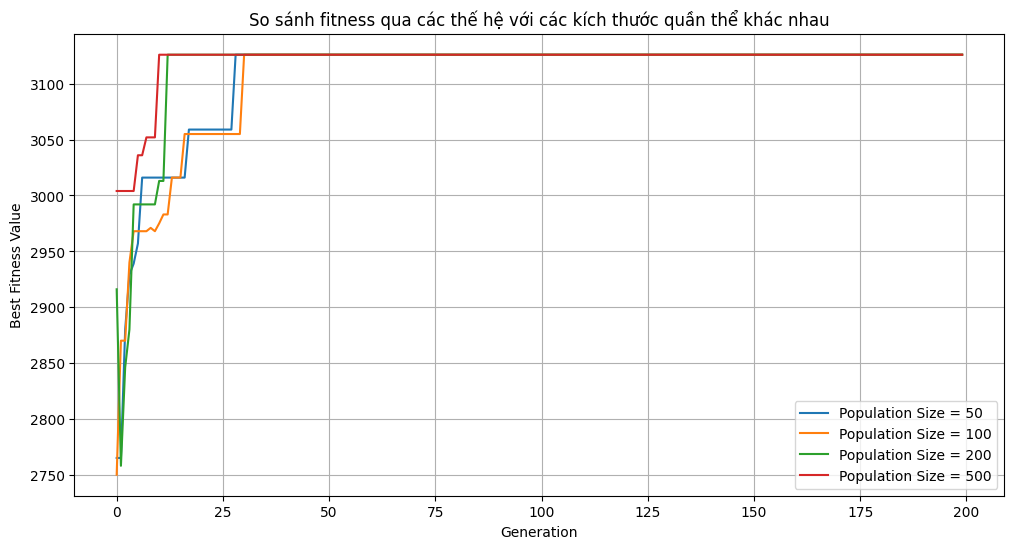

In [18]:
plt.figure(figsize=(12, 6))
for pop_size in population_sizes:
    plt.plot(experiment_results[pop_size]['fitness_history'], 
             label=f'Population Size = {pop_size}')

plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.title('So sánh fitness qua các thế hệ với các kích thước quần thể khác nhau')
plt.legend()
plt.grid(True)
plt.show()

### Bảng kết quả

| Population Size                 | Best Fitness                                              | Convergence Speed                                            | Stability (Std)                  |
|----------------------------------|-----------------------------------------------------------|-------------------------------------------------------------|-----------------------------------|
| Kích thước quần thể (số cá thể) | Fitness tốt nhất trong quần thể tại một thế hệ nhất định | Tốc độ hội tụ (số thế hệ hoặc thời gian để đạt mức tối ưu)  | Độ ổn định trung bình qua các thế hệ |


In [21]:
# Hiển thị bảng kết quả chi tiết
print("\nKết quả chi tiết:")
print("-" * 80)
print(f"| {'Population Size':^15} | {'Best Fitness':^15} | {'Convergence Speed':^20} | {'Stability (Std)':^17} |")
print("-" * 80)

for pop_size in population_sizes:
    history = experiment_results[pop_size]["fitness_history"]
    final_fitness = history[-1]
    
    # Tính tốc độ hội tụ (số thế hệ để đạt 95% fitness cuối cùng)
    convergence_gen = next(
        (i for i, x in enumerate(history) if x >= 0.95 * final_fitness), len(history)
    )
    
    # Tính độ ổn định (trung bình cộng std qua các thế hệ)
    stability_std = np.std(history)

    print(f"| {pop_size:^15} | {final_fitness:^15} | {convergence_gen:^20} | {round(stability_std,2):^17.2f} |")

print("-" * 80)



Kết quả chi tiết:
--------------------------------------------------------------------------------
| Population Size |  Best Fitness   |  Convergence Speed   |  Stability (Std)  |
--------------------------------------------------------------------------------
|       50        |      3126       |          6           |       52.24       |
|       100       |      3126       |          8           |       52.68       |
|       200       |      3126       |          4           |       46.31       |
|       500       |      3126       |          0           |       22.58       |
--------------------------------------------------------------------------------


### Phân tích độ ổn định của fitness qua các thế hệ

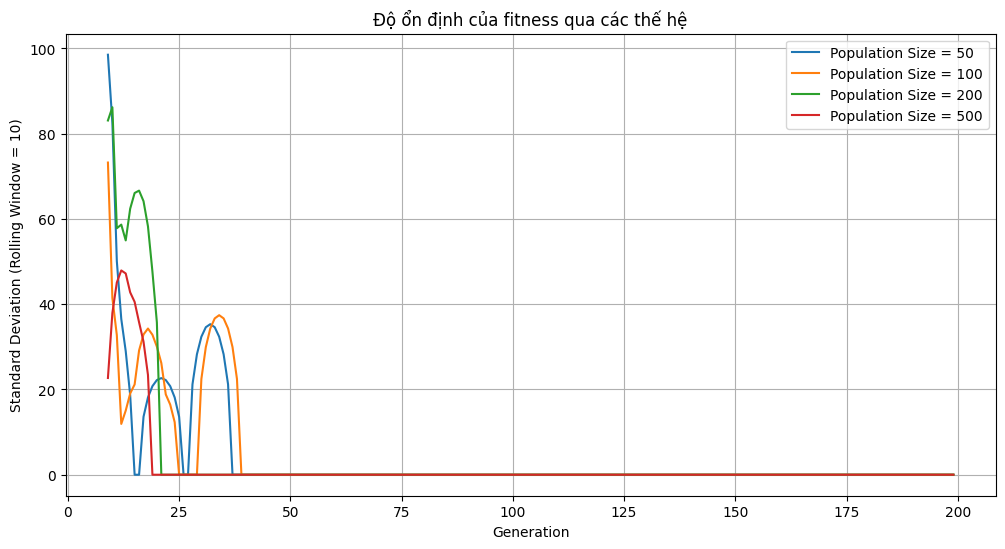

In [22]:
# Phân tích thêm về tính ổn định
plt.figure(figsize=(12, 6))
for pop_size in population_sizes:
    history = experiment_results[pop_size]['fitness_history']
    # Tính độ dao động của fitness
    rolling_std = pd.Series(history).rolling(window=10).std()
    plt.plot(rolling_std, label=f'Population Size = {pop_size}')

plt.xlabel('Generation')
plt.ylabel('Standard Deviation (Rolling Window = 10)')
plt.title('Độ ổn định của fitness qua các thế hệ')
plt.legend()
plt.grid(True)
plt.show()

### Tổng Kết Sau Khi Thí Nghiệm

In [23]:
# Tổng kết
for pop_size in population_sizes:
    history = experiment_results[pop_size]['fitness_history']
    final_fitness = history[-1]
    
    print(f"\nKích thước quần thể {pop_size}:")
    print(f"- Fitness cuối cùng: {final_fitness}")
    print(f"- Tốc độ hội tụ: {next((i for i, x in enumerate(history) if x >= 0.95 * final_fitness), len(history))} thế hệ")
    print(f"- Độ ổn định (std): {np.std(history):.2f}")


Kích thước quần thể 50:
- Fitness cuối cùng: 3126
- Tốc độ hội tụ: 6 thế hệ
- Độ ổn định (std): 52.24

Kích thước quần thể 100:
- Fitness cuối cùng: 3126
- Tốc độ hội tụ: 8 thế hệ
- Độ ổn định (std): 52.68

Kích thước quần thể 200:
- Fitness cuối cùng: 3126
- Tốc độ hội tụ: 4 thế hệ
- Độ ổn định (std): 46.31

Kích thước quần thể 500:
- Fitness cuối cùng: 3126
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 22.58


---
# Tổng Hợp
---

### 1. Các tình huống

- Chạy nhiều lần mỗi test case, từ 10 đến 20.
- Kết quả sau mỗi lần chạy toàn bộ 6 test case ở file Testcase.txt.
- Tính trung bình cộng toàn bộ thông số bao gồm: fitness cuối cùng, tốc độ hội tụ, độ ổn định sau số lần chạy tuỳ ý.


**Testcase 1:**
| Kích thước quần thể | Fitness cuối cùng | Tốc độ hội tụ (thế hệ) | Độ ổn định (std) |
|---------------------|-------------------|-----------------------|------------------|
| 50                  | 55                | 5                     | 0.67             |
| 100                 | 56                | 2                     | 0.81             |
| 200                 | 56                | 6                     | 1.37             |
| 500                 | 56                | 5                     | 0.64             |

<br>

**Testcase 2:**
| Kích thước quần thể | Fitness cuối cùng | Tốc độ hội tụ (thế hệ) | Độ ổn định (std) |
|---------------------|-------------------|-----------------------|------------------|
| 50                  | 69                | 6                     | 1.69             |
| 100                 | 69                | 5                     | 1.39             |
| 200                 | 69                | 2                     | 1.02             |
| 500                 | 69                | 8                     | 1.76             |

<br>

**Testcase 3:**
| Kích thước quần thể | Fitness cuối cùng | Tốc độ hội tụ (thế hệ) | Độ ổn định (std) |
|---------------------|-------------------|-----------------------|------------------|
| 50                  | 3284              | 3                     | 35.88            |
| 100                 | 3284              | 1                     | 29.46            |
| 200                 | 3284              | 6                     | 45.59            |
| 500                 | 3284              | 3                     | 33.15            |

<br>

**Testcase 4:**
| Kích thước quần thể | Fitness cuối cùng | Tốc độ hội tụ (thế hệ) | Độ ổn định (std) |
|---------------------|-------------------|-----------------------|------------------|
| 50                  | 7502              | 3                     | 88.90            |
| 100                 | 7547              | 3                     | 97.36            |
| 200                 | 7572              | 8                     | 119.99           |
| 500                 | 7487              | 5                     | 85.81            |

<br>

**Testcase 5:**
| Kích thước quần thể | Fitness cuối cùng | Tốc độ hội tụ (thế hệ) | Độ ổn định (std) |
|---------------------|-------------------|-----------------------|------------------|
| 50                  | 78765             | 14                    | 3097.50          |
| 100                 | 78765             | 19                    | 2989.70          |
| 200                 | 78765             | 17                    | 3183.15          |
| 500                 | 79009             | 26                    | 3665.24          |

<br>

**Testcase 6:**
| Kích thước quần thể | Fitness cuối cùng | Tốc độ hội tụ (thế hệ) | Độ ổn định (std) |
|---------------------|-------------------|-----------------------|------------------|
| 50                  | 52840             | 14                    | 1854.49          |
| 100                 | 52742             | 18                    | 1741.35          |
| 200                 | 52775             | 8                     | 2167.01          |
| 500                 | 52775             | 19                    | 2566.73          |

### 2. Phân tích và đánh giá

1. **Kết quả Fitness cuối cùng:**
   - Fitness cuối cùng của các quần thể trong tất cả các test case đều có sự thay đổi nhỏ khi tăng kích thước quần thể. Mặc dù một số quần thể lớn hơn có fitness cao hơn chút ít (như trong Testcase 4, 5 và 6), nhưng sự khác biệt này không đáng kể.
   - Các quần thể nhỏ hơn (50 cá thể) có thể đạt được fitness tối ưu khá nhanh, nhưng không ổn định như các quần thể lớn hơn. Điều này chứng tỏ rằng quần thể lớn hơn có thể duy trì sự đa dạng và tránh bị mắc kẹt trong các cực trị cục bộ.

2. **Tốc độ hội tụ (số thế hệ):**
   - Quần thể nhỏ (50 cá thể) có xu hướng hội tụ nhanh hơn, đạt kết quả tối ưu trong 2-6 thế hệ ở hầu hết các test case. Điều này chứng tỏ rằng quần thể nhỏ có thể tìm kiếm và tối ưu nhanh chóng, nhưng khả năng duy trì sự đa dạng giảm.
   - Quần thể lớn (500 cá thể) thường mất nhiều thế hệ hơn để hội tụ, với số thế hệ từ 5-26 để đạt được kết quả tối ưu. Tuy nhiên, việc hội tụ chậm lại cho thấy sự ổn định cao hơn trong quá trình tìm kiếm giải pháp tối ưu, tránh được sự phụ thuộc vào các cực trị cục bộ.

3. **Độ ổn định (std):**
   - Quần thể nhỏ có độ ổn định thấp (std thấp), chứng tỏ rằng fitness của các cá thể trong quần thể có sự phân tán lớn hơn. Điều này có thể dẫn đến sự không nhất quán trong kết quả và giảm hiệu quả của quá trình tìm kiếm.
   - Quần thể lớn có độ ổn định cao hơn, với std dao động từ 0.64 đến 3665.24, chứng tỏ sự phân tán thấp hơn và sự ổn định cao hơn giữa các cá thể trong quần thể. Điều này giúp cho quá trình hội tụ ổn định hơn, dù tốc độ hội tụ chậm.


**Quần thể nhỏ (50-100 cá thể):** Thích hợp cho các bài toán đơn giản hoặc yêu cầu tốc độ hội tụ nhanh, nhưng độ ổn định thấp có thể khiến kết quả không chắc chắn.

**Quần thể lớn (200-500 cá thể):** Thích hợp cho các bài toán phức tạp, nơi yêu cầu sự ổn định cao hơn và khả năng tránh các cực trị cục bộ, mặc dù tốc độ hội tụ chậm hơn.
